$$ u_{t}+2 u_{x} =0 ,$$ for $0\leq t \leq 1,$ $0\leq x \leq 1 $
$$ u(0,x) = u_{0}(x) =  \begin{cases} 
      10^4 (0.1-x)^2 (0.2-x)^2 &  0 < x <  0.2 \\
      0 &  otherwise
   \end{cases}  $$
   with wind coefficient $\alpha = 2 $ , $Nt = 100$ ,$Nx = 250$ resulting to Courant number $v = 0.4$ and additional for $Nt = 100,Nx = 200$ with $v =0.5$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def Upwind(Nx,Nt,xmin,xmax,tmin,tmax,a):
    
    
    Nx = Nx+1                         # Number of grid points
    dx = (xmax-xmin)/(Nx-1)           # Mesh size
    x = np.linspace(xmin,xmax,Nx)     # Discretized mesh
    dt = 1/Nt                         # Time step
    N = int(tmax/dt)                  # Number of iterations
    t = np.linspace(0.,tmax,N+1)      # Time vector
    v   = dt/dx
    
    U = np.zeros((N+1,Nx))
    U[0,:] = np.where( (0.1<x) & (x<0.2) , ((10**4)*(0.1-x)**2 *((0.2-x)**2)),0) 
    Uex = U[0,:]                      

    
    # from page 70 equation (6.12) from Dr.Georgoulis Notes 
    for n in range (0,N):
        if (a>0.):
            for i in range (1,Nx):
                U[n+1,i] = ((1 - a*v)*U[n,i])  +  a*v*U[n,i-1]
           
        else:
            for i in range (0,Nx-1):
                U[n+1,i] = ((1 + a*v)*U[n,i])  -   a*v*U[n,i-1]
           
    
    def u(t,x):
        xp = (x - a*tmax - xmin)%(xmax-xmin) + xmin
        u0 = np.where( (0.1<xp) & (xp<0.2) , ((10**4)*((0.1-xp))**2 *((0.2-xp)**2)), 0)
        return u0
  
    plt.plot(x,U[n+1,:])
    plt.plot(x,u(t,x))
    plt.gca().legend(('Upwind scheme (v='+str(v)+')','Exact solution'))

    plt.title('t='+str(tmax),fontsize=16)
    plt.xlabel('x',fontsize=18)
    plt.ylabel('u',fontsize=18)

    plt.show()

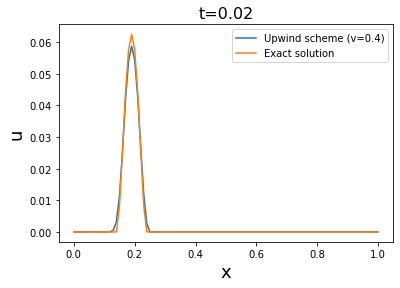

In [4]:
Upwind(100,250,0.,1.,1.,0.02,2.)

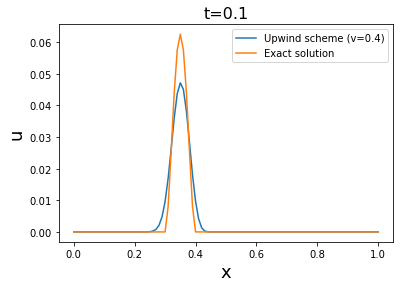

In [5]:
Upwind(100,250,0.,1.,1.,0.1,2.)

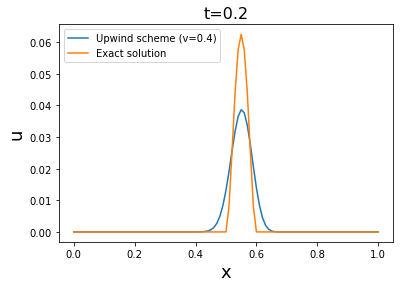

In [6]:
Upwind(100,250,0.,1.,1.,0.2,2.)

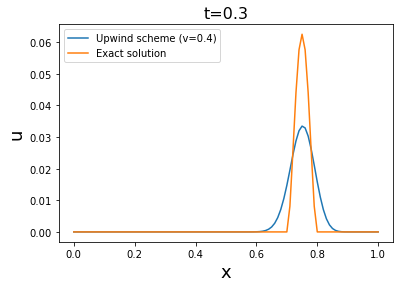

In [7]:
Upwind(100,250,0.,1.,1.,0.3,2.)

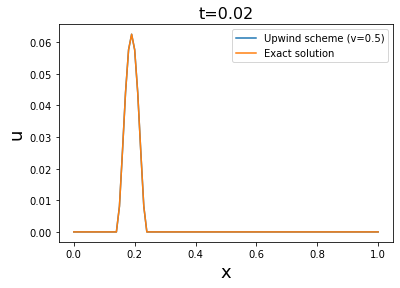

In [8]:
Upwind(100,200,0.,1.,0.,0.02,2.)

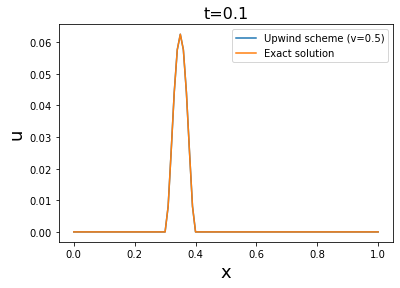

In [9]:
Upwind(100,200,0.,1.,0.,0.1,2.)

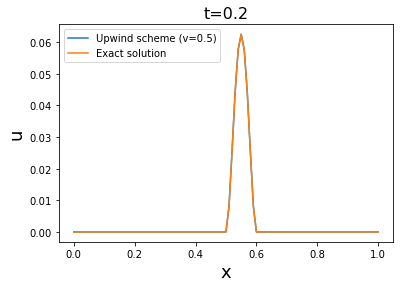

In [10]:
Upwind(100,200,0.,1.,0.,0.2,2.)

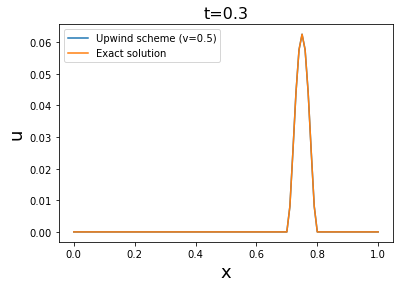

In [11]:
Upwind(100,200,0.,1.,0.,0.3,2.)

Implemention of recursion inside the for loop :
$$u_{i}^{n+1} = \dfrac{a \nu }{2}(1+a \nu) u_{i-1}^{n} + (1- a^{2}\nu^{2})u_{i}^{n}   \dfrac{a \nu }{2}(1-a \nu) u_{i+1}^{n}$$ 

from page 77 equation (6.22) from Dr.Georgoulis Notes 


Simplifying the above we get : 

$$u_{i}^{n+1} = u_{i}^{n} - \frac{1}{2}  a  \nu (u_{i+1}^{n} - u_{i-1}^{n}) + \frac{1}{2} \theta (u_{i+1}^{n} -2 u_{i}^{n} + u_{i-1}^{n} )$$
where $\theta = (a \frac{ d_{t}}{d_{x}})^{2}$

In [12]:
def LaxWendroff(Nx,Nt,xmin,xmax,tmin,tmax,a):
    
    
    Nx = Nx+1                         # Number of grid points
    dx = (xmax-xmin)/(Nx-1)           # Mesh size
    x = np.linspace(xmin,xmax,Nx)     # Discretized mesh
    dt = 1/Nt                         # Time step
    N = int(tmax/dt)                  # Number of iterations
    t = np.linspace(0.,tmax,N+1)      # Time vector
    v   = dt/dx
    
    theta = (a*dt/dx)**2
    
    U = np.where( (0.1<x) & (x<0.2) , ((10**4)*(0.1-x)**2 *((0.2-x)**2)),0) 
    Uex = U
    
    
    ## from page 66 equation (6.22) from Dr.Georgoulis Notes (simplified)
    for n in range (1,len(t)):
        Un = U
        Um = np.roll(Un,1)
        Up = np.roll(Un,-1)
        U  = Un - 0.5*a*v*(Up-Um) + 0.5*theta*(Up-2*Un+Um)
          
  
        
    def u(t,x):
        xp = (x - a*tmax - xmin)%(xmax-xmin) + xmin
        u0 = np.where( (0.1<xp) & (xp<0.2) , ((10**4)*((0.1-xp))**2 *((0.2-xp)**2)), 0)
        return u0
  
    plt.plot(x,U)
    plt.plot(x,u(t,x))
    plt.gca().legend(('Lax-Wendroff scheme (v='+str(v)+')','Exact solution'))

    plt.title('t='+str(tmax),fontsize=16)
    plt.xlabel('x',fontsize=18)
    plt.ylabel('u',fontsize=18)

    plt.show()

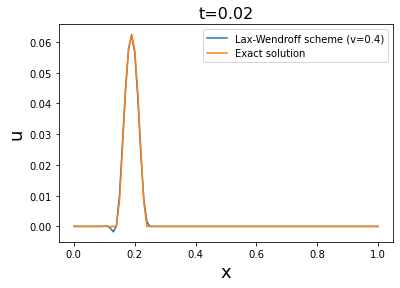

In [13]:
LaxWendroff(100,250,0.,1.,0.,0.02,2.)

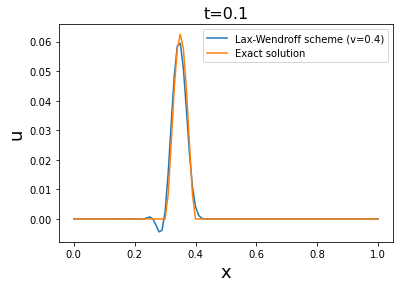

In [14]:
LaxWendroff(100,250,0.,1.,0.,0.1,2.)

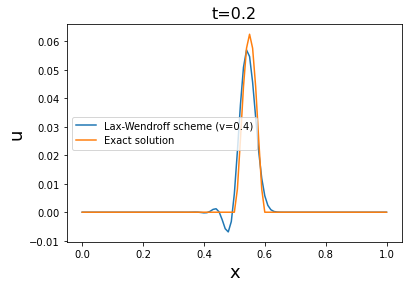

In [15]:
LaxWendroff(100,250,0.,1.,0.,0.2,2.)

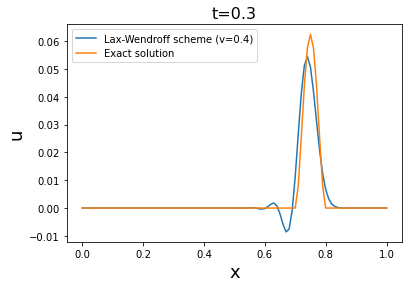

In [16]:
LaxWendroff(100,250,0.,1.,0.,0.3,2.)